# ***Data Science & HPC 4th Project***

## ***Initializing and Importing Packages***

In [1]:
using BenchmarkTools, LinearAlgebra, Plots, ProgressMeter, StaticArrays, Distributed

theme(:dark)
Plots.default(titlefontsize=12, tickfontsize=10, labelfontsize=12, legendfontsize=9,
    fontfamily="Computer Modern", frame=:box, label=nothing)

## ***Problem 1:***

In [2]:
A = rand(200, 100);
B = rand(100, 200);

In [3]:
function SimpleTrace(A::T, B::T) where {T<:AbstractMatrix}
    n_A, m_A = size(A)
    n_B, m_B = size(B)
    if m_A != n_B || n_A != m_B
        error("Matrix dimensions do not match")
    end
    trace = zero(eltype(A))
    for i ∈ 1:n_A
        for k ∈ 1:m_A
            trace += A[i, k] * B[k, i]
        end
    end
    return trace
end

function SITrace(A::T, B::T) where {T<:AbstractMatrix}
    n_A, m_A = size(A)
    n_B, m_B = size(B)
    if m_A != n_B || n_A != m_B
        error("Matrix dimensions do not match")
    end
    trace = zero(eltype(A))
    @simd for i ∈ 1:n_A
        @simd for k ∈ 1:m_A
            @inbounds trace += A[i, k] * B[k, i]
        end
    end
    return trace
end

function SimdTrace(A::T, B::T) where {T<:AbstractMatrix}
    n_A, m_A = size(A)
    n_B, m_B = size(B)
    if m_A != n_B || n_A != m_B
        error("Matrix dimensions do not match")
    end
    trace = zero(eltype(A))
    @simd for i ∈ 1:n_A
        @simd for k ∈ 1:m_A
            trace += A[i, k] * B[k, i]
        end
    end
    return trace
end

function InboundsTrace(A::T, B::T) where {T<:AbstractMatrix}
    n_A, m_A = size(A)
    n_B, m_B = size(B)
    if m_A != n_B || n_A != m_B
        error("Matrix dimensions do not match")
    end
    trace = zero(eltype(A))
    for i ∈ 1:n_A
        for k ∈ 1:m_A
            @inbounds trace += A[i, k] * B[k, i]
        end
    end
    return trace
end

function LATrace(A::T, B::T) where {T<:AbstractMatrix}
    n_A, m_A = size(A)
    n_B, m_B = size(B)
    if m_A != n_B || n_A != m_B
        error("Matrix dimensions do not match")
    end
    C = zeros(eltype(A), n_A, m_B)
    for i ∈ 1:n_A
        for k ∈ 1:m_A
            C[i, i] += A[i, k] * B[k, i]
        end
    end
    return tr(C)
end

LATrace (generic function with 1 method)

In [4]:
SITrace(A, B) ≈ tr(A * B)

true

In [5]:
@benchmark SimdTrace($A, $B)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  17.700 μs … 684.400 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     20.400 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   25.969 μs ±  15.035 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █ █▆▅▄▅▃▄▃▁▁         ▁▁▁▁▁▁▁▁                                ▂
  █▆██████████▇██▆▇█████████████████▆▆▆▅▆▆▆▆▇▇▆▇▇█▇▇▆▆▇▆▆▅▅▆▅▄ █
  17.7 μs       Histogram: log(frequency) by time      81.7 μs <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [6]:
@benchmark InboundsTrace($A, $B)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  18.700 μs … 698.400 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     26.250 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   32.971 μs ±  24.390 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▇▅ █▅▇▅▆▅▃▅▁▅▂▁   ▁▁▂▂▂▂▂▃▂▃▃▃▁▁▂▂         ▁ ▁  ▁▁▁          ▂
  ███████████████████████████████████▇▇▇██▇█████▇▇███▇▇▆▃▇▅▆▄▅ █
  18.7 μs       Histogram: log(frequency) by time      89.8 μs <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [7]:
@benchmark SITrace($A, $B)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  18.600 μs … 743.900 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     25.300 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   30.651 μs ±  25.224 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █▄ ▅▆▄▅▃▆▄▅▅▃ ▄ ▁▁    ▁ ▁▁▁▁▂▂▁▂▁▁ ▁▁                        ▂
  ██▇███████████████████████████████████▇▇▅▆▆▇▆▆▇▆▆▇▇▆▆▇▇█▇▇▅▅ █
  18.6 μs       Histogram: log(frequency) by time      82.2 μs <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [8]:
@benchmark SimpleTrace($A, $B)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  18.800 μs … 711.400 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     28.200 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   34.129 μs ±  23.358 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █▄▃▆▅▆▅▆▅▆▃▆▄▂▂▂▁▁▂▂▂▂▂▃▃▃▃▂▂▂▂▁   ▁        ▁▁               ▂
  █████████████████████████████████▇▇█▇█▇▇███▇███▇▇▆▇▅▄▅▆▅▆▅▄▆ █
  18.8 μs       Histogram: log(frequency) by time      96.7 μs <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [9]:
@benchmark LATrace($A, $B)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):   51.400 μs …   6.965 ms  ┊ GC (min … max):  0.00% … 96.12%
 Time  (median):     189.100 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   223.559 μs ± 342.029 μs  ┊ GC (mean ± σ):  11.50% ±  7.69%

    ▃▅▁▆▅▅▅▅▅█▇▇▅▄▂ ▂                                            
  ▇▇██████████████████▇▆▆▅▅▄▄▃▃▃▂▃▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▁▂▁▂▂▁▂▂▁▂▂▂▂ ▄
  51.4 μs          Histogram: frequency by time          772 μs <

 Memory estimate: 312.55 KiB, allocs estimate: 2.

In [10]:
SIMinRTs = Float64[]
LAMinRTs = Float64[]
p = Progress(50)
for i ∈ 1:50
    A = rand(10, i)
    B = rand(i, 10)
    push!(SIMinRTs, minimum(@benchmark SITrace($A, $B)).time)
    push!(LAMinRTs, minimum(@benchmark LATrace($A, $B)).time)
    next!(p)
    update!(p)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:05:17
Progress: 100%|█████████████████████████████████████████| Time: 0:05:17


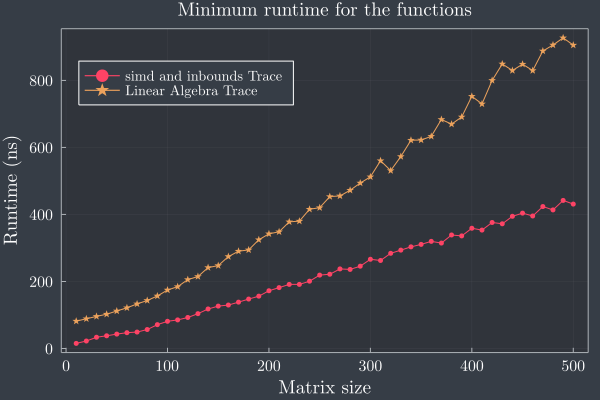

In [11]:
plot(10 * collect(1:50), SIMinRTs, label="simd and inbounds Trace", m=:c, ms=3, msw=0)
plot!(10 * collect(1:50), LAMinRTs, label="Linear Algebra Trace", m=:s, ms=4, msw=0)
plot!(title="Minimum runtime for the functions", xlabel="Matrix size", ylabel="Runtime (ns)", legend=150)

We set the conditions in such a way that we are sure that the indexes will not go out of `@bounds`, so we can use inbounds.

## ***Problem 2:***

In [12]:
A = rand(200, 100);
B = rand(100, 200);

In [3]:
function STMatrixProd(A::T, B::T) where {T<:AbstractMatrix}
    n_A, m_A = size(A)
    n_B, m_B = size(B)
    if m_A != n_B
        error("Matrix dimensions do not match")
    end
    C = zeros(eltype(A), n_A, m_B)
    @simd for j ∈ 1:m_B
        @simd for i ∈ 1:n_A
            @simd for k ∈ 1:n_B
                @inbounds C[i, j] += A[i, k] * B[k, j]
            end
        end
    end
    return C
end

function MTMatrixProd(A::T, B::T) where {T<:AbstractMatrix}
    n_A, m_A = size(A)
    n_B, m_B = size(B)
    if m_A != n_B
        error("Matrix dimensions do not match")
    end
    C = zeros(eltype(A), n_A, m_B)
    Threads.@threads for j ∈ 1:m_B
        @simd for i ∈ 1:n_A
            @simd for k ∈ 1:n_B
                @inbounds C[i, j] += A[i, k] * B[k, j]
            end
        end
    end
    return C
end

BIMAtrixProd(A::T, B::T) where {T<:AbstractMatrix} = A * B

BIMAtrixProd (generic function with 1 method)

In [14]:
@benchmark STMatrixProd($A, $B)

BenchmarkTools.Trial: 754 samples with 1 evaluation.
 Range (min … max):  3.873 ms … 14.282 ms  ┊ GC (min … max): 0.00% … 45.96%
 Time  (median):     6.435 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   6.598 ms ±  1.159 ms  ┊ GC (mean ± σ):  0.50% ±  3.39%

                    ▁▇▇█▇▅▂▁▁                                 
  ▂▃▂▃▂▃▃▂▃▄▃▄▄▅▅▅▇▇█████████▆▅▄▄▄▃▃▃▃▃▃▃▃▃▃▁▃▂▃▂▂▁▃▂▂▂▁▁▂▃▂ ▃
  3.87 ms        Histogram: frequency by time        10.7 ms <

 Memory estimate: 312.55 KiB, allocs estimate: 2.

In [15]:
@benchmark MTMatrixProd($A, $B)

BenchmarkTools.Trial: 3695 samples with 1 evaluation.
 Range (min … max):  1.033 ms …   7.881 ms  ┊ GC (min … max): 0.00% … 82.45%
 Time  (median):     1.254 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.341 ms ± 412.575 μs  ┊ GC (mean ± σ):  2.00% ±  6.11%

  ▁▄▅▆▇██▇▆▅▄▄▃▃▂▁▁▁  ▁ ▁                                     ▂
  ██████████████████████████▆▇▆▆▆▇▅▃▅▇▇▁▃▃▁▄▃▃▃▁▁▃▃▃▃▃▁▁▅▃▄▅▄ █
  1.03 ms      Histogram: log(frequency) by time      3.08 ms <

 Memory estimate: 317.44 KiB, allocs estimate: 43.

In [16]:
@benchmark BIMAtrixProd($A, $B)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  168.700 μs …   7.475 ms  ┊ GC (min … max): 0.00% … 78.43%
 Time  (median):     348.200 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   335.347 μs ± 316.116 μs  ┊ GC (mean ± σ):  6.53% ±  7.12%

  ▁▇           █▄                                                
  ███▄▃▃▂▂▂▂▂▂▇██▇▆▅▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▂▂▂▁▁▂▁▂▂▂▂▂▂▁▁▁▁▁▂▂▂▂▂ ▃
  169 μs           Histogram: frequency by time          992 μs <

 Memory estimate: 312.55 KiB, allocs estimate: 2.

In [17]:
STMPMinRTs = Float64[]
MTMPMinRTs = Float64[]
BIMPMinRTs = Float64[]
p = Progress(40)
for i ∈ 1:40
    A = rand(5, i)
    B = rand(i, 5)
    push!(STMPMinRTs, minimum(@benchmark STMatrixProd($A, $B)).time)
    push!(MTMPMinRTs, minimum(@benchmark MTMatrixProd($A, $B)).time)
    push!(BIMPMinRTs, minimum(@benchmark BIMAtrixProd($A, $B)).time)
    next!(p)
    update!(p)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:08:55
Progress: 100%|█████████████████████████████████████████| Time: 0:08:55


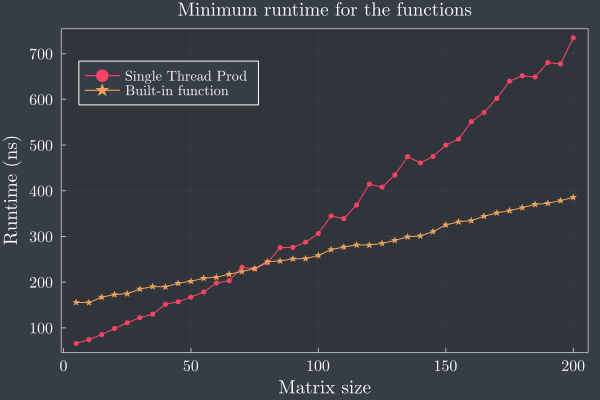

In [18]:
plot(5 * collect(1:40), STMPMinRTs, label="Single Thread Prod", m=:c, ms=3, msw=0)
plot!(5 * collect(1:40), BIMPMinRTs, label="Built-in function", m=:s, ms=4, msw=0)
plot!(title="Minimum runtime for the functions", xlabel="Matrix size", ylabel="Runtime (ns)", legend=150)

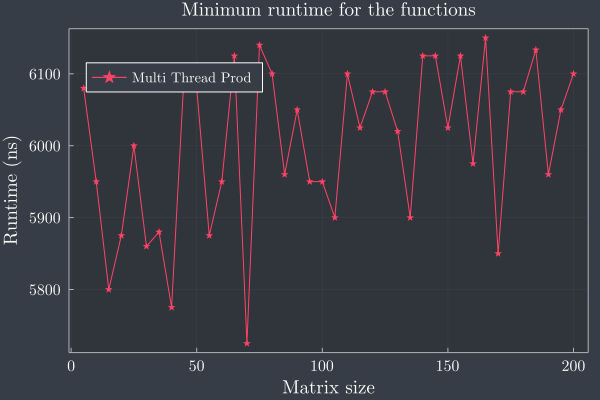

In [19]:
plot(5 * collect(1:40), MTMPMinRTs, label="Multi Thread Prod", m=:s, ms=4, msw=0)
plot!(title="Minimum runtime for the functions", xlabel="Matrix size", ylabel="Runtime (ns)", legend=150)

In [4]:
STMPMinRTsExt = Float64[]
MTMPMinRTsExt = Float64[]
BIMPMinRTsExt = Float64[]
Prog = Progress(25)
for i ∈ 1:25
    A = rand(50, i)
    B = rand(i, 50)
    push!(STMPMinRTsExt, minimum(@benchmark STMatrixProd($A, $B)).time)
    push!(MTMPMinRTsExt, minimum(@benchmark MTMatrixProd($A, $B)).time)
    push!(BIMPMinRTsExt, minimum(@benchmark BIMAtrixProd($A, $B)).time)
    next!(Prog)
    update!(Prog)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:08:58
Progress: 100%|█████████████████████████████████████████| Time: 0:08:58


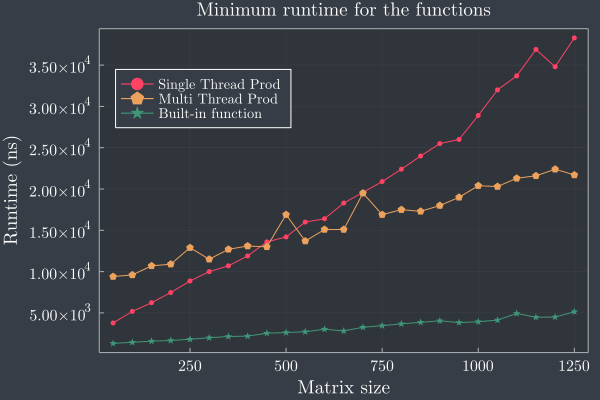

In [6]:
plot(50 * collect(1:25), STMPMinRTsExt, label="Single Thread Prod", m=:c, ms=3, msw=0)
plot!(50 * collect(1:25), MTMPMinRTsExt, label="Multi Thread Prod", m=:p, ms=4, msw=0)
plot!(50 * collect(1:25), BIMPMinRTsExt, label="Built-in function", m=:s, ms=4, msw=0)
plot!(title="Minimum runtime for the functions", xlabel="Matrix size", ylabel="Runtime (ns)", legend=150)

## ***Problem 3:***

In [22]:
function MultiThreadMC(N::Integer)
    Distance(ΔR) = sqrt(sum(ΔR .^ 2))
    ThreadsCounts = zeros(eltype(N), Threads.nthreads())
    Threads.@threads for i in 1:N
        r = rand(2)
        if Distance(r - [0.0, 0.0]) < 1 && Distance(r - [1.0, 0.0]) < 1 && Distance(r - [0.0, 1.0]) < 1 && Distance(r - [1.0, 1.0]) < 1
            @inbounds ThreadsCounts[Threads.threadid()] += 1
        end
    end
    return sum(ThreadsCounts) / N
end

MultiThreadMC (generic function with 1 method)

In [23]:
MultiThreadMC(1000_000)

0.315312

In [24]:
@time MultiThreadMC(1000_000)

  0.748994 seconds (9.53 M allocations: 726.727 MiB, 60.55% gc time)


0.314629

In [25]:
@benchmark MultiThreadMC($1000_000)

BenchmarkTools.Trial: 9 samples with 1 evaluation.
 Range (min … max):  249.087 ms …    1.320 s  ┊ GC (min … max):  0.00% … 76.05%
 Time  (median):     304.733 ms               ┊ GC (median):     0.00%
 Time  (mean ± σ):   574.941 ms ± 457.780 ms  ┊ GC (mean ± σ):  52.13% ± 38.13%

  █  ▁                                                           
  █▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▆▆▁▁▁▁▁▁▁▁▁▁▆ ▁
  249 ms           Histogram: frequency by time          1.32 s <

 Memory estimate: 726.52 MiB, allocs estimate: 9522684.

## ***Problem 4:***

In [15]:
@everywhere function CheckCrossLine(LengthRatio::Real, LineCount::Integer)
    x = rand() * LineCount
    θ = rand() * π
    xᵣ = x + LengthRatio / 2 * cos(θ)
    xₗ = x - LengthRatio / 2 * cos(θ)
    return xᵣ > LengthRatio || xₗ < 0.0
end

@inline function DistributedEstNeedleCL(LengthRatio::Real, LineCount::Integer, Steps::Integer)
    Counts = @distributed (+) for _ in 1:Steps
        sum(CheckCrossLine(LengthRatio, LineCount) for j in 1:Steps)
    end
    return Counts / (Steps * Steps)
end

@inline function SerialEstNeedleCL(LengthRatio::Real, LineCount::Integer, Steps::Integer)
    return sum(CheckCrossLine(LengthRatio, LineCount) for j in 1:Steps) / Steps
end

SerialEstNeedleCL (generic function with 1 method)

In [ ]:
addprocs(7)
nprocs()

In [8]:
DistributedEstNeedleCL(1, 1, 1000)

0.314465

In [9]:
SerialEstNeedleCL(1, 1, 1000_000)

0.314897

In [14]:
@benchmark DistributedEstNeedleCL(1, 1, $100)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  257.100 μs …   2.440 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     351.400 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   388.844 μs ± 132.538 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▃ ▂▇▃█▅▄▄▂▂▁▂   ▁                                              
  █████████████▇▅▇█▅▅▄▃▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▃
  257 μs           Histogram: frequency by time          874 μs <

 Memory estimate: 1.28 KiB, allocs estimate: 20.

In [12]:
@benchmark SerialEstNeedleCL(1, 1, $100_00)

BenchmarkTools.Trial: 1312 samples with 1 evaluation.
 Range (min … max):  2.678 ms …   7.423 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     3.739 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   3.804 ms ± 720.893 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

   ▂   ▁▁  ▁▃▁▅▂▅▆█▇▄█▄▇▃ ▂                                    
  ▆██████▇▇████████████████▆▆▅▄▄▄▄▅▄▃▄▄▃▃▄▃▃▃▃▁▃▂▂▂▃▃▃▂▃▁▁▃▂▂ ▅
  2.68 ms         Histogram: frequency by time        6.38 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

As you can see, there is a big difference in the runtimes and the `distributed` version is much more optimal.

## ***Problem 5:***

When we work with completely fixed arrays, using `SArray` makes our work much more efficient. Because stack-allocation replaces Julia's default alloc.

If the array we are working with has a fixed size but its members are variable, then it is appropriate to use `MARrays`.

In [27]:
BIMAtrixProd(A::T, B::T) where {T<:AbstractMatrix} = A * B

BIMAtrixProd (generic function with 1 method)

In [7]:
StaticRunTime, BuiltInRunTime = Float64[], Float64[]
p = Progress(30)
for n ∈ 1:30
    A = rand(5, n)
    B = rand(n, 5)
    Stat = @benchmark A * B setup=(A = @SArray rand($n, $n); B = @SArray rand($n, $n))
    BI = @benchmark BIMAtrixProd($A, $B)
    push!(StaticRunTime, minimum(Stat).time)
    push!(BuiltInRunTime, minimum(BI).time)
    next!(p)
    update!(p)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:03:31
Progress: 100%|█████████████████████████████████████████| Time: 0:03:31


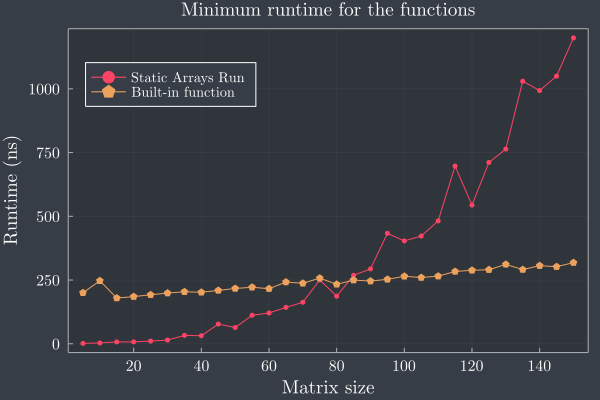

In [8]:
plot(5 * collect(1:30), StaticRunTime, label="Static Arrays Run", m=:c, ms=3, msw=0)
plot!(5 * collect(1:30), BuiltInRunTime, label="Built-in function", m=:p, ms=4, msw=0)
plot!(title="Minimum runtime for the functions", xlabel="Matrix size", ylabel="Runtime (ns)", legend=150)